## Motivation

Different views for one resource, what are the options:
* client overfetches
* custom endpoints
* query parameters
/contacts?include=names,addresses,phone_numbers,emails

graphQL can be seen as an extension of the last approach


#### What is it [1]
* exposes a single endpoint
* endpoint parses and execute a query
* excutes over a type system
* type system availabel via introspection

[1] from https://www.youtube.com/watch?v=gY48GW87Feo

#### Advantages?
* no over or underfetching
* easy mental model
  * query looks like the data
* no multiple roundtrips to the server (speed and developer time)
* introspection, self-documenting
  * less time writing documention
  * less time figuring an API out
* no new endpoints for additional features
* components can be made independent
  * parent components do not have to pass data down
* strongly typed
  * it can be ensured that only valid queries will be requested

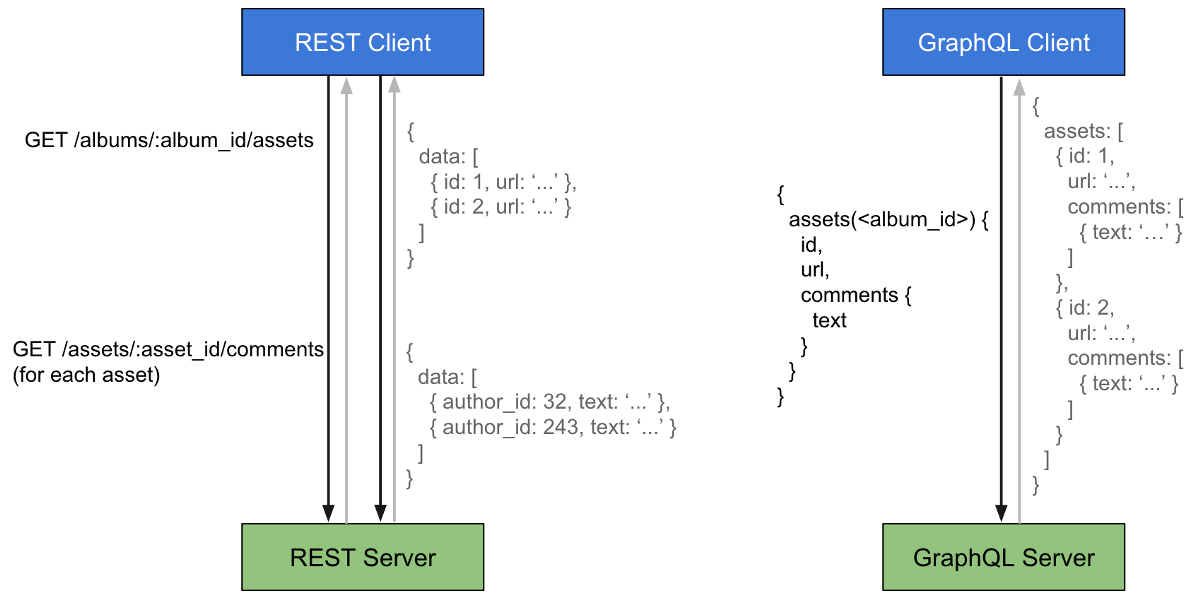

In [1]:
from IPython.display import Image
Image('rest_vs_graphql.png')
# https://medium.com/chute-engineering/graphql-in-the-age-of-rest-apis-b10f2bf09bba#.9qsbvgurs

# REST-y?

In [12]:
import requests

actor_name = 'Sean Connery'
params = {'q': actor_name}
api_url = 'http://imdb.wemakesites.net/api/'
r = requests.get(api_url + 'search', params=params)

In [13]:
r.json()['data']['results']['names']

[{'id': 'nm0005141',
  'thumbnail': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjAyMzE1MTg4OF5BMl5BanBnXkFtZTcwNDU5ODI0Mw@@._V1_UX32_CR0,0,32,44_AL_.jpg',
  'title': 'Sean Lennon',
  'url': 'http://www.imdb.com/name/nm0005141/?ref_=fn_al_nm_1'},
 {'id': 'nm4406254',
  'thumbnail': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjA0NjE2MTA3OF5BMl5BanBnXkFtZTgwNzQ4ODU0MDI@._V1_UX32_CR0,0,32,44_AL_.jpg',
  'title': 'Sean Kelly',
  'url': 'http://www.imdb.com/name/nm4406254/?ref_=fn_al_nm_2'},
 {'id': 'nm5050331',
  'thumbnail': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ1NTcyOTI3OV5BMl5BanBnXkFtZTcwODk4Njk3Nw@@._V1_UX32_CR0,0,32,44_AL_.jpg',
  'title': 'Sean Lowe',
  'url': 'http://www.imdb.com/name/nm5050331/?ref_=fn_al_nm_3'},
 {'id': 'nm0000707',
  'thumbnail': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTYxNDYwNjI2NF5BMl5BanBnXkFtZTgwOTMyNDU3OTE@._V1_UY44_CR0,0,32,44_AL_.jpg',
  'title': 'Sean Young',
  'url': 'http://www.imdb.com/name/nm0000

In [14]:
names = r.json()['data']['results']['names']
actor_id = [name['id'] for name in names if name['title'] == actor_name][0]
actor_id

'nm0000125'

In [15]:
r = requests.get(api_url + actor_id)

In [16]:
r.json()['data']

{'description': 'Sean Connery is best known for portraying the character James Bond, starring in seven Bond films between 1962 and 1983. In 1988, Connery won the Academy Award for Best Supporting Actor for his role in The Untouchables (1987). His film career also includes such films as Marnie (1964), Der Name der Rose (1986), The League of Extraordinary Gentlemen ...                                See full bio &raquo;',
 'filmography': [{'info': 'http://www.imdb.com/title/tt0851471/?ref_=nm_flmg_act_1',
   'title': 'Sir Billi',
   'year': '&nbsp;2012'},
  {'info': 'http://www.imdb.com/title/tt0455566/?ref_=nm_flmg_act_2',
   'title': 'James Bond 007: From Russia with Love',
   'year': '&nbsp;2005'},
  {'info': 'http://www.imdb.com/title/tt0311429/?ref_=nm_flmg_act_3',
   'title': 'The League of Extraordinary Gentlemen',
   'year': '&nbsp;2003'},
  {'info': 'http://www.imdb.com/title/tt0361185/?ref_=nm_flmg_act_4',
   'title': 'Freedom: A History of Us',
   'year': '&nbsp;2003'},
  {'in

In [7]:
for film in r.json()['data']['filmography']:
    print(film['year'][6:], film['title'])

2012 Sir Billi
2005 James Bond 007: From Russia with Love
2003 The League of Extraordinary Gentlemen
2003 Freedom: A History of Us
2000 Finding Forrester
1999 Entrapment
1998 Playing by Heart
1998 The Avengers
1996 The Rock
1996 DragonHeart
1995 First Knight
1995 Just Cause
1994 A Good Man in Africa
1993 Rising Sun
1992 Medicine Man
1991 Robin Hood: Prince of Thieves
1991 Highlander II: The Quickening
1990 The Russia House
1990 The Hunt for Red October
1989 Family Business
1989 Indiana Jones and the Last Crusade
1988 Memories of Me
1988 The Presidio
1987 The Untouchables
1986 Der Name der Rose
1986 Highlander
1984 Sword of the Valiant: The Legend of Sir Gawain and the Green Knight
1983 Never Say Never Again
1982 Five Days One Summer
1982 Wrong Is Right
1981 Time Bandits
1981 Outland
1979 Cuba
1979 Meteor
1979 The First Great Train Robbery
1977 A Bridge Too Far
1976 The Next Man
1976 Robin and Marian
1976 Circasia
1975 The Man Who Would Be King
1975 The Wind and the Lion
1974 Murder on 

#### Get the duration from "movie resource"

In [8]:
r.json()['data']['filmography'][0]

{'info': 'http://www.imdb.com/title/tt0851471/?ref_=nm_flmg_act_1',
 'title': 'Sir Billi',
 'year': '&nbsp;2012'}

In [9]:
import re

def get_id(info):
    m = re.search(r'http://www.imdb.com/title/(.+?)/', info)
    return m.group(1)

get_id('http://www.imdb.com/title/tt0851471/?ref_=nm_flmg_act_1')

'tt0851471'

In [10]:
r = requests.get('http://imdb.wemakesites.net/api/tt0851471')
r.json()

{'code': 200,
 'data': {'cast': ['Ford Kiernan',
   'Greg Hemphill',
   'Alana Gray',
   'Valentina Hartmann',
   'Barbara Rafferty',
   'Regina Reagan',
   'John Amabile',
   'Ruby Wax',
   'Sean Connery',
   'Alan Cumming',
   'Jamie Still',
   'Alex Norton',
   'Larry Sullivan',
   'Tallia Storm',
   'Miriam Margolyes'],
  'certificate': None,
  'description': 'When tragedy strikes in the highlands, there can be only one Scotsman for the job - Sir William Sedgewick, aka Sir Billi! This is an adventure story about the power of a remote Scottish, but yet international community held together by the eccentric, skate-boarding veterinarian and their race to save an illegal fugitive - Bessie Boo the beaver! Sir Billi and the village clash with the law in their fight to rescue Bessie! As they brave treacherous ravines and hazardous waters in the battle to save the illegal beaver the question remains - who will get to her first? A roller coaster adventure, Sir Billi is undoubtedly the highl

In [19]:
# really slow

r = requests.get(api_url + actor_id)

def get_duration(id):
    url = 'http://imdb.wemakesites.net/api/' + id
    return requests.get(url).json()['data']['duration']

for movie in r.json()['data']['filmography']:
    year = movie['year'][6:]
    title = movie['title']
    movie_id = get_id(movie['info'])
    duration = get_duration(movie_id)
    print(year, title, duration)

2012 Sir Billi 1h 16min
2005 James Bond 007: From Russia with Love None
2003 The League of Extraordinary Gentlemen 1h 50min
2003 Freedom: A History of Us None
2000 Finding Forrester 2h 16min
1999 Entrapment 1h 53min
1998 Playing by Heart 2h 1min
1998 The Avengers 1h 29min
1996 The Rock 2h 16min
1996 DragonHeart 1h 43min
1995 First Knight 2h 14min
1995 Just Cause 1h 42min
1994 A Good Man in Africa 1h 34min
1993 Rising Sun 2h 5min
1992 Medicine Man 1h 46min
1991 Robin Hood: Prince of Thieves 2h 23min
1991 Highlander II: The Quickening 1h 31min
1990 The Russia House 2h 3min
1990 The Hunt for Red October 2h 15min
1989 Family Business 1h 50min


KeyboardInterrupt: 

# Graphene / GraphQL

In [1]:
import graphene as gr
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:///imdb.db', convert_unicode=True)

class Actor(gr.ObjectType):
    id = gr.Int()
    name = gr.String(description='The name of the actor in the form: lastname, firstname')
    gender = gr.String()
    # Note: string reference
    movies = gr.List('Movie')
    
    def resolve_movies(self, args, context, info=None):
        sql = sqlalchemy.text(
            '''
            select t.id, t.title, t.production_year, i.info as rating
            from title t
            join cast_info c on(c.movie_id = t.id)
            left join movie_info i on(t.id = i.movie_id)                      
            where
              c.person_id = :id and
              i.info_type_id = 1 and
              i.info NOT GLOB '*[A-Za-z]*' and
              t.kind_id = 1
            order by t.production_year desc
            '''
        )
        result = engine.execute(sql, id=self.id)
        return get_movies_from_query(result)


class Movie(gr.ObjectType):
    id = gr.Int()
    title = gr.String(description='The name of the movie')
    year = gr.Int()
    runtime = gr.Float()
    actors = gr.List('Actor')
    
    def resolve_actors(self, args, context, info=None):
        sql = sqlalchemy.text(
            '''
            select n.id, n.name, n.gender
            from name n
            join cast_info c on(n.id = person_id)
            where c.movie_id = :movie_id
            '''
        )
        result = engine.execute(sql, movie_id=self.id)
        return get_actors_from_query(result)

def get_movies_from_query(query_result):
    movies = []
    for (id, title, year, runtime) in query_result:
        movies.append(
            Movie(id=id, title=title, year=year, runtime=runtime)
        )
    return movies

def get_actors_from_query(query_result):
    actors = []
    for (id, name, gender) in query_result:
        actors.append(Actor(id=id, name=name, gender=gender))
    return actors


class Query(gr.ObjectType):
    actors = gr.Field(
        gr.List(Actor),
        name=gr.NonNull(gr.String()),
    )
    movies = gr.Field(
        gr.List(Movie),
        title=gr.NonNull(gr.String(), description='Name of the movie'),
        match_exact=gr.Boolean(description='If True, matches the exact title of the movie'),
    )
    
    def resolve_actors(self, args, context, info=None):

        sql = sqlalchemy.text(
            '''
            select id, name, gender from name
            where name like :name
            '''
        )
        
        name = args['name']
        name_wildcards = '%' + name + '%'
        result = engine.execute(sql, name=name_wildcards)
        
        return get_actors_from_query(result)
    
    def resolve_movies(self, args, context, info=None):

        sql = sqlalchemy.text(
            '''
            select 
              t.id,
              t.title,
              t.production_year,
              i.info as runtime
            from title t
            left join movie_info i on(t.id = i.movie_id)
            where
              t.kind_id = 1 and
              i.info_type_id = 1 and
              i.info NOT GLOB '*[A-Za-z]*' and
              t.title like :title
            '''
        )
        title = args['title']
        match_exact = args.get('match_exact')
        if not match_exact:
            title = '%' + title + '%'
        result = engine.execute(sql, title=title)
        
        return get_movies_from_query(result)

schema = gr.Schema(query=Query)

In [2]:
from flask import Flask
from flask_graphql import GraphQLView

app = Flask('app')
app.debug = True

app.add_url_rule(
    '/graphql',
    view_func=GraphQLView.as_view(
        'graphql',
        schema=schema,
        graphiql=True
    )
)
app.run(use_reloader=False)

### Interactive:

http://localhost:5000/graphql

In [24]:
result = schema.execute(
    '''
    {
      actors(name: "Connery, Sean") {
        movies {
          year,
          title,
          runtime,
        }
      }
    }
    '''
)


for movie in result.data['actors'][0]['movies']:
    print(movie['year'], movie['title'], movie['runtime'])

import json
#print(json.dumps(result.data, indent=2))

2016 Masterminds 94.0
2012 Ever to Excel 80.0
2012 Everything or Nothing 98.0
2012 Sir Billi 76.0
2009 Franco Cristaldi e il suo cinema Paradiso 102.0
2003 The League of Extraordinary Gentlemen 110.0
2000 Finding Forrester 136.0
1999 Entrapment 113.0
1998 Junket Whore 57.0
1998 Playing by Heart 121.0
1998 The Avengers 89.0
1998 The Avengers 115.0
1996 DragonHeart 103.0
1996 The Rock 136.0
1995 First Knight 134.0
1995 Just Cause 102.0
1994 A Good Man in Africa 94.0
1993 Rising Sun 125.0
1992 Medicine Man 106.0
1992 Tribulation 99: Alien Anomalies Under America 48.0
1991 Highlander II: The Quickening 91.0
1991 Robin Hood: Prince of Thieves 143.0
1990 The Hunt for Red October 135.0
1990 The Russia House 123.0
1989 Family Business 110.0
1989 Indiana Jones and the Last Crusade 127.0
1988 John Huston: The Man, the Movies, the Maverick 126.0
1988 The Presidio 97.0
1987 The Untouchables 119.0
1986 Der Name der Rose 130.0
1986 Highlander 116.0
1986 Highlander 110.0
1983 G'olé! 101.0
1983 Never 

there is much more...
* integrations with django, SQLAlchemy, google app engine
* mutations
* fragments
* relay
* parallelism: resolve can return promises
